In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

to convert this file to py : `jupyter nbconvert --to script binary.ipynb`


In [2]:
#load data
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease.shape , heart_disease.columns ,heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


((303, 14),
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
       dtype='object'),
 None)

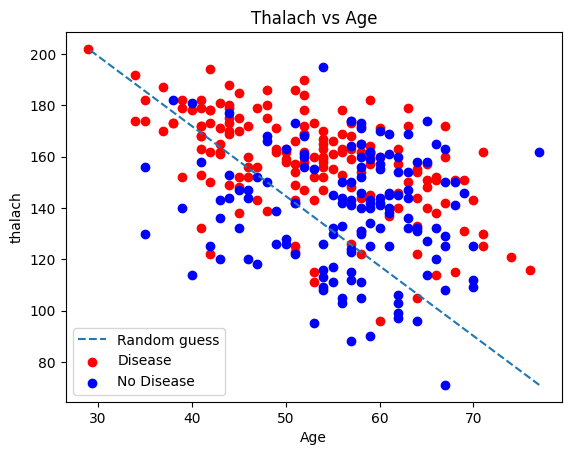

In [4]:

plt.plot([heart_disease.age.max() , heart_disease.age.min() ] ,[heart_disease.thalach.min() , heart_disease.thalach.max()]  , linestyle='--' , label='Random guess')
#have  a heart disease
plt.scatter(heart_disease.age[heart_disease.target == 1] , heart_disease.thalach[heart_disease.target == 1] , color='red' , label='Disease')

#don't have a heart disease
plt.scatter(heart_disease.age[heart_disease.target == 0] , heart_disease.thalach[heart_disease.target == 0] , color='blue' , label='No Disease')


plt.xlabel('Age')
plt.ylabel('thalach')
plt.title('Thalach vs Age')

 
plt.legend(loc='lower left')
plt.show()

In [5]:
#finding correlation matrix
cor_matrix = heart_disease.corr()
cor_matrix.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


<Axes: >

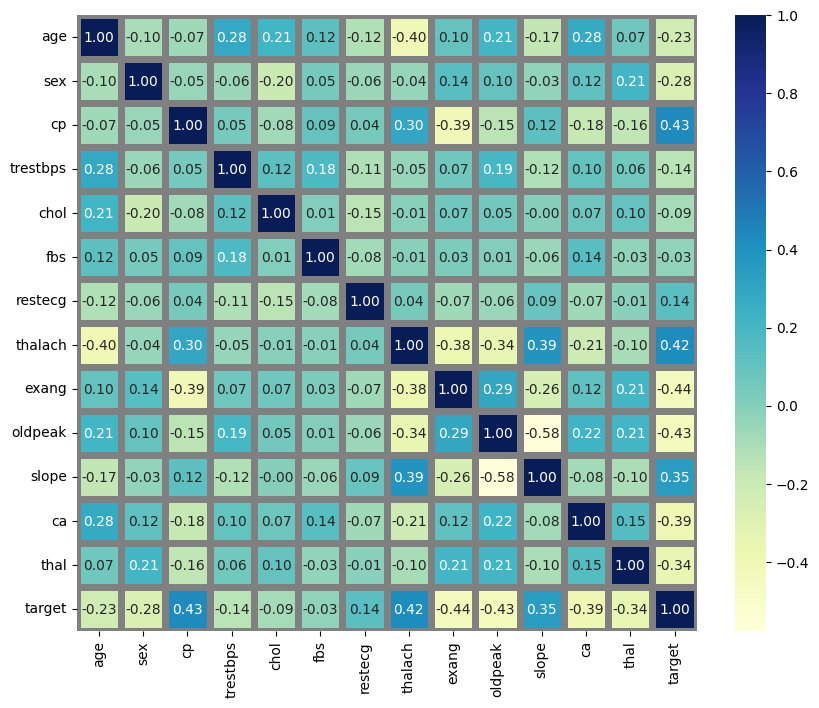

In [6]:
fig , ax = plt.subplots(figsize = (10 , 8))

sns.heatmap(
    cor_matrix,
    annot=True,
    fmt=".2f", # format string to 2 decimal places
    cbar=True,
    linewidths=5,
    cmap='YlGnBu',
    linecolor='grey'
)



In [7]:
#taking only most correlated columns with target

new_heart_disease = heart_disease[['target']]

selected_cols = [col for col in heart_disease.columns if abs(cor_matrix[col]['target']) >= 0.3]


new_heart_disease = heart_disease[selected_cols]

new_heart_disease.head()  ,new_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       303 non-null    int64  
 1   thalach  303 non-null    int64  
 2   exang    303 non-null    int64  
 3   oldpeak  303 non-null    float64
 4   slope    303 non-null    int64  
 5   ca       303 non-null    int64  
 6   thal     303 non-null    int64  
 7   target   303 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 19.1 KB


(   cp  thalach  exang  oldpeak  slope  ca  thal  target
 0   3      150      0      2.3      0   0     1       1
 1   2      187      0      3.5      0   0     2       1
 2   1      172      0      1.4      2   0     2       1
 3   1      178      0      0.8      2   0     2       1
 4   0      163      1      0.6      2   0     2       1,
 None)

<Axes: >

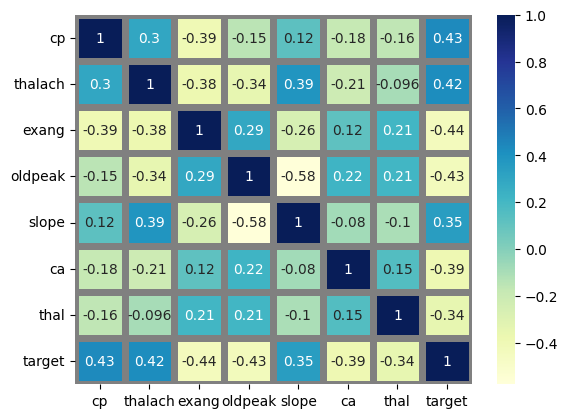

In [8]:
new_cor_matrix = new_heart_disease.corr()
sns.heatmap(
    new_cor_matrix,
    annot=True,
    linewidths=5,
    cmap='YlGnBu',
    linecolor='grey'
)

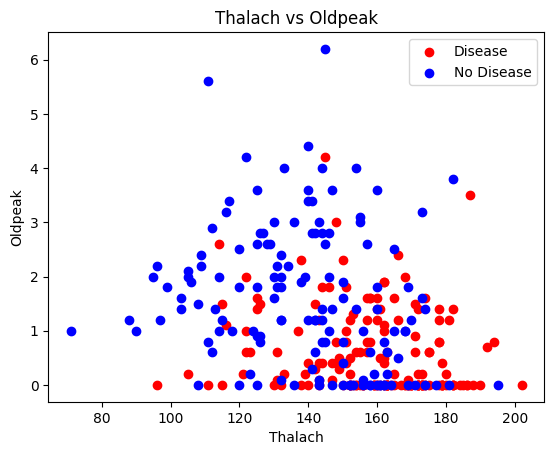

In [9]:
#plot
plt.scatter(new_heart_disease.thalach[new_heart_disease.target == 1], new_heart_disease.oldpeak[new_heart_disease.target == 1] , color = 'red' , label = 'Disease')

plt.scatter(new_heart_disease.thalach[new_heart_disease.target == 0], new_heart_disease.oldpeak[new_heart_disease.target == 0] , color = 'blue' , label = 'No Disease')

plt.xlabel('Thalach')
plt.ylabel('Oldpeak')

plt.legend()
plt.title('Thalach vs Oldpeak')
plt.show()

In [10]:
def full_histogram(df):
    df.hist(figsize=(15,7))
    plt.show()

In [11]:
def sigmoid(z):
    z = np.clip(z, -500, 500) ## to avoid overflow
    return 1.0 / (1 + np.exp(-z))


In [12]:
def predict(features , weights , bias):
    z = np.dot(features , weights) + bias ## its shape is   242 * 1
    return sigmoid(z)

# cost function



for binary classification, the cost fucntion is `binary cross-entropy loss`
goes by:

$$
\boxed {
L(y,\hat{y})=-\frac{1}{N}\sum _{i=1} ^N(y\log(\hat{y}) + (1-y)\log (1-\hat y)
}
$$
<br>
here 

`y` is the actual value

`hat{y}` is the predicted value

$$
\hat{y} = \sigma(z) = \frac{1}{1+e^{-z}}
$$

here,
$$
z = w_1 x_1 + w_2 x_2 + \dots + b
$$

`w_1` , `w_2` , `b` are the weights and bias || 
`x_1` , `x_2` are the features

so

$$
\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + \dots + b) = \frac{1}{1+e^{w_1 x_1 + w_2 x_2 + \dots + b}}


### derivation of sigmoid

$$
\begin{aligned}
\sigma(z) &= \frac{1}{1+e^{-z}} \\
now, \\
\frac{d }{dz}\sigma(z) = \sigma'(z) &= \frac{d}{dz}\left( \frac{1}{1+e^{-z}}\right) \\
&=-(1+e^{-z})^{-2}.-e^{-z} \\
&=\frac{e^{-z}}{(1+e^{-z})^2} \\
&=\frac{1}{(1+e^{-z})}.\frac{e^{-z}}{(1+e^{-z})} \\
&=\frac{1}{(1+e^{-z})}.\left( \frac{1+e^{-z} - 1}{1 + e^{-z}} \right) \\

&=\frac{1}{(1+e^{-z})}. \left(1-  \frac{1}{1 + e^{-z}} \right) \\

&=\sigma(z).\left( 1-\sigma(z) \right)


\end{aligned}
$$

### now finding gradient from cost function

Finding w.r.t `w1`

$$
\begin{aligned}
\frac{\partial L}{\partial w_1} 


&= -\sum_{1} ^N \left( \frac{\partial }{\partial w_1}  (y\log(\hat y) + (1-y)\log(1-\hat y)) \right) \\

&= -\sum_{1} ^N \left( \frac{\partial }{\partial w_1} (y\log(\sigma(z)) + (1-y)\log(1-\sigma(z))) \right) \\

&= -\sum_{1} ^N \left( \frac{y}{\sigma(z)} \sigma'(z)x_1 - \frac{1-y}{1-\sigma(z)}\sigma'(z)x_1 \right) \\

&= -\sum_{1} ^N \left( \frac{y(1-\sigma(z)) \sigma'(z) x_1 - (1-y) \sigma(z) \sigma'(z) x_1}{\sigma(z)(1-\sigma(z))} \right) \\

&= -\sum_{1} ^N \left( \frac{y \sigma'(z) x_1 - y \sigma(z) \sigma'(z) x_1 - \sigma(z) \sigma'(z) x_1  + y \sigma(z) \sigma'(z) x_1}{\sigma(z)(1-\sigma(z) )} \right) \\

&= -\sum_{1} ^N \left( \frac{y \sigma'(z) x_1  - \sigma(z) \sigma'(z) x_1  }{\sigma(z)(1-\sigma(z) )} \right) \\

&= -\sum_{1} ^N \left(  \frac{y \sigma'(z) x_1  - \sigma(z) \sigma'(z) x_1 }{ \sigma'(z)} \right) \\

&= -\sum_{1} ^N (y - \sigma(z)) x_1  \\

&= \sum_{1} ^N (\sigma(z)-y) x_1  \\

&= \sum_{1} ^N (\hat y - y) x_1  \\
\end{aligned}
$$

<br>

Vectorzing the equation

$$
\nabla_w L = \frac{1}{N} X^\top (\hat y - y)
$$

# Functions

In [13]:
def cost_function(features, labels, weights , bias):
    """
    Features = (242,7)
    labels = (242,1)
    weights = (7,1)
    bias = 1
    cost = -(labels * log(prediction) + (1 - labels) * log(1 - prediction)) / len(labels)
    """
    
    prediction = predict(features , weights , bias) 
    
    epsilon = 1e-9
    prediction = np.clip(prediction, epsilon, 1 - epsilon)

    class1 = labels * np.log(prediction)
    class2 = (1 - labels) * np.log(1 - prediction)
    
    cost = -np.sum(class1 + class2) / len(labels)
        
    return cost
    
    

In [14]:
def update_weights(features , labels , weights , bias , learning_rate):
    """

    Args:
        features (_type_): (242,7)
        labels (_type_): (242,1)
        weights (_type_): (7,1)
        bias (_type_): 1
        learning_rate (_type_): 0.01
    """
    
    N = len(labels)
    
    prediction = predict(features ,  weights, bias) # (242,1)
    error = prediction - labels # (242,1)
    
    weighs_gradient = np.dot(features.T , error) / N # (7,1)
    bias_gradient = np.sum(error) / N # 1
    
    weights = weights - learning_rate * weighs_gradient # (7,1)
    bias = bias - learning_rate * bias_gradient  # 1
    
    return weights , bias
    
    
    

In [15]:
def decision_boundary(prob):
    return 1 if prob >= 0.5 else 0

In [16]:
def train(features , labels, weights, bias , lr , iter):
    cost_history = []
    
    for i in range(iter):
        weights , bias = update_weights(features , labels , weights , bias , lr)
        
        cost = cost_function(features, labels , weights , bias)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration : {i} , weight : {weights} , bias : {bias} , cost : {cost}")
            
            print("\n")
            
    return weights , bias , cost_history
    

In [17]:
def normalize(values):
    rng = np.max(values) - np.min(values)
    mean = np.mean(values)
    
    values -= mean
    
    if rng != 0:
        values /= rng
    
    return values

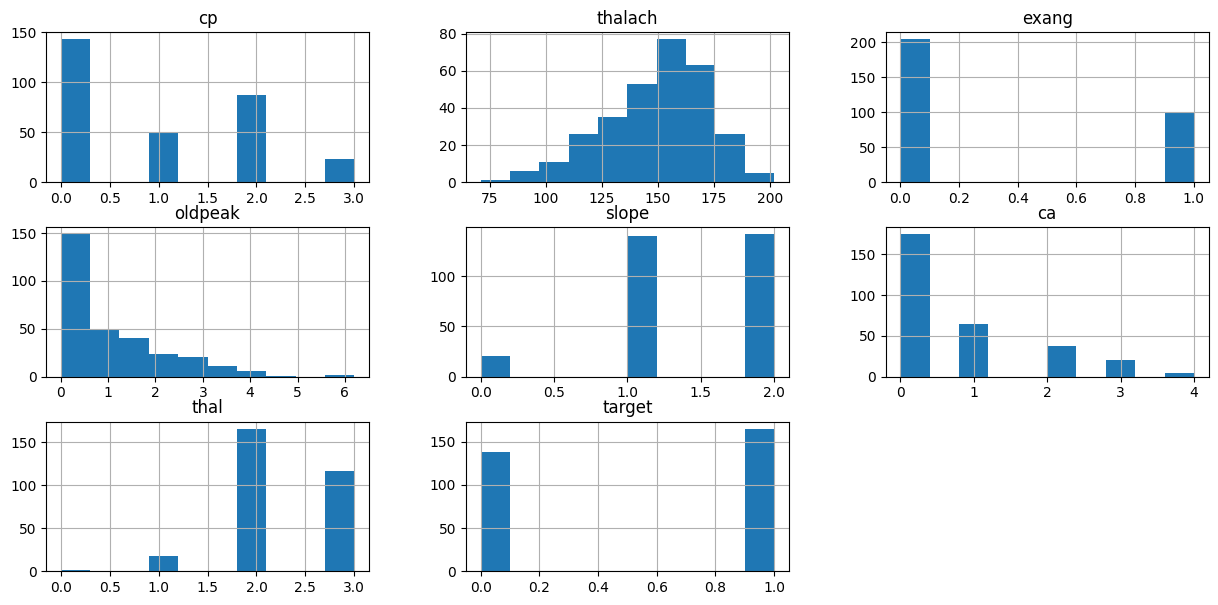

In [18]:
# before normilizing : 
full_histogram(new_heart_disease)

/var/folders/g4/ycv9zz8s491bcrcwtkgshy3r0000gn/T/ipykernel_1662/3780928721.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_heart_disease[col] = normalize(new_heart_disease[col])


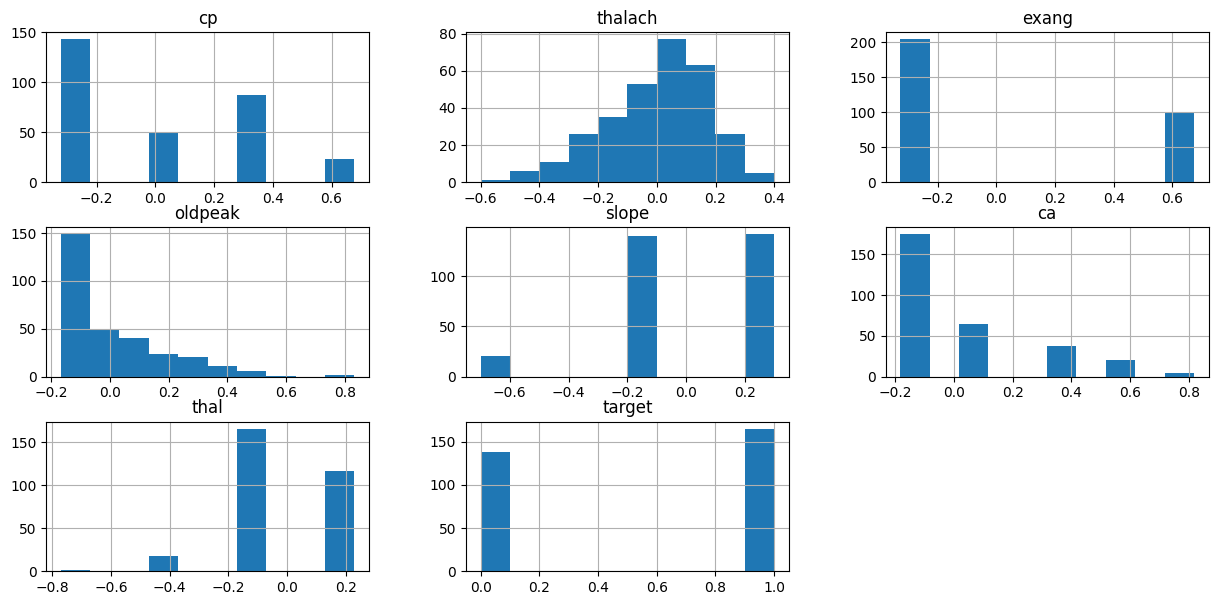

In [19]:
#normalizing all columns

for col in new_heart_disease.columns:
    if col == 'target':
        continue
    new_heart_disease[col] = normalize(new_heart_disease[col])

#after normalizing
full_histogram(new_heart_disease)

In [20]:
#using scikit learn just to get random shuffled data
from sklearn.model_selection import train_test_split

X = new_heart_disease.drop('target' , axis=1).values
y = new_heart_disease['target'].values.reshape(-1,1)

x_train , x_test,  y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=42 , shuffle=True , stratify=y)

x_train.shape , y_train.shape , x_test.shape , y_test.shape


((242, 7), (242, 1), (61, 7), (61, 1))

In [52]:
weights = np.zeros(x_train.shape[1])
weights = weights.reshape(-1,1)
bias = 0.0
learning_rate = 0.06
iter = 5000
weights.shape

(7, 1)

In [53]:
weights , bias , cost_history = train(x_train , y_train , weights , bias , learning_rate , iter)

Iteration : 0 , weight : [[ 0.00474075]
 [ 0.00211763]
 [-0.00634563]
 [-0.00256874]
 [ 0.00367032]
 [-0.0027287 ]
 [-0.0022685 ]] , bias : 0.002727272727272727 , cost : 0.6913625471061949


Iteration : 100 , weight : [[ 0.40706573]
 [ 0.18184131]
 [-0.50648627]
 [-0.22490788]
 [ 0.31010656]
 [-0.24548888]
 [-0.2054851 ]] , bias : 0.14880795892401202 , cost : 0.57144489454584


Iteration : 200 , weight : [[ 0.70326224]
 [ 0.31497882]
 [-0.8140465 ]
 [-0.39608089]
 [ 0.52875261]
 [-0.44187843]
 [-0.37277371]] , bias : 0.1910764999495078 , cost : 0.5133964215822628


Iteration : 300 , weight : [[ 0.93193267]
 [ 0.41904016]
 [-1.00694853]
 [-0.5348445 ]
 [ 0.69296319]
 [-0.60665128]
 [-0.51643644]] , bias : 0.2069736350077513 , cost : 0.48079867247731517


Iteration : 400 , weight : [[ 1.1155885 ]
 [ 0.50399777]
 [-1.13002918]
 [-0.65215489]
 [ 0.82156953]
 [-0.74877698]
 [-0.64380569]] , bias : 0.21404656965355434 , cost : 0.4602530932704767


Iteration : 500 , weight : [[ 1.2674561 ]
 [

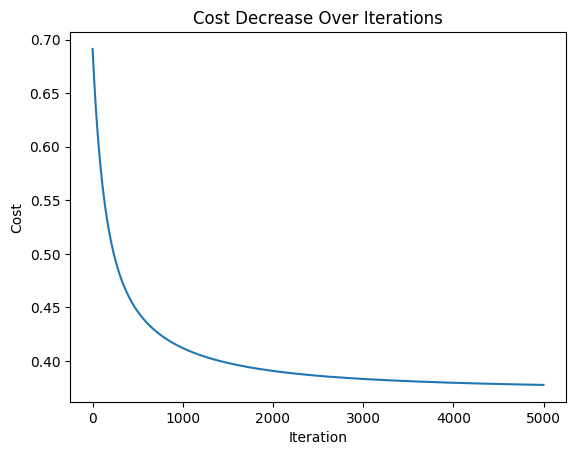

In [54]:
#plotting cost over iterations
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Decrease Over Iterations')
plt.show()

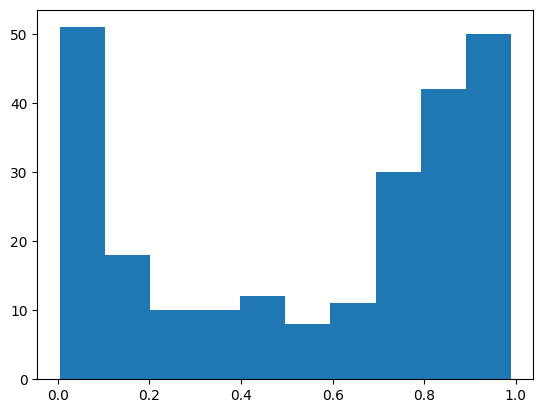

In [55]:
#predicted values on training data

plt.hist(predict(x_train , weights , bias))
plt.show()

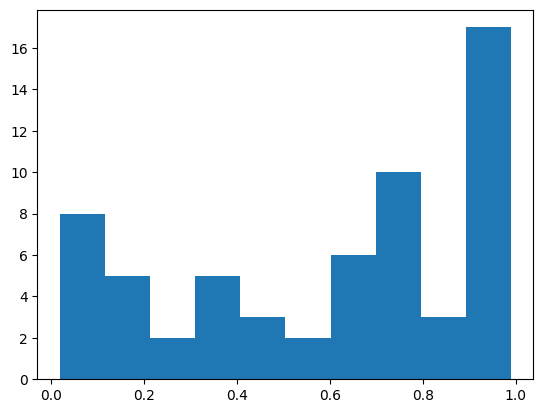

In [56]:
#predicted values on test data

plt.hist(predict(x_test , weights , bias))
plt.show()

In [57]:
def accuracy(y_true, y_pred):
    """
    Calculate accuracy
    """
    y_pred_binary = (y_pred >= 0.5).astype(int)
    return np.mean(y_true == y_pred_binary)


In [58]:
# # ##accuracy of training data

y_pred = predict(x_train, weights, bias)
my_model_train_accuracy = accuracy(y_train , y_pred)
my_model_train_accuracy

np.float64(0.8636363636363636)

In [59]:
# ##accuracy of testing data
y_pred = predict(x_test, weights, bias)
my_model_test_accuracy = accuracy(y_test , y_pred)
my_model_test_accuracy

np.float64(0.7704918032786885)

In [41]:

#trying sklearn
from sklearn.model_selection import train_test_split
np.random.seed(42)
Scikit_X = new_heart_disease.drop('target' , axis=1)
Scikit_y = new_heart_disease['target']

Scikit_x_train , Scikit_x_test,  Scikit_y_train , Scikit_y_test = train_test_split(Scikit_X, Scikit_y , test_size=0.2 , random_state=42 , shuffle=True  )
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=5000)

model.fit(Scikit_x_train, Scikit_y_train)

Scikit_y_pred_test = model.predict(Scikit_x_test)

scikit_test_accuracy = accuracy_score(Scikit_y_test , Scikit_y_pred_test)
scikit_test_accuracy


0.8688524590163934

In [30]:
Scikit_y_pred_train = model.predict(Scikit_x_train)

scikit_train_accuracy = accuracy_score(Scikit_y_train , Scikit_y_pred_train)
scikit_train_accuracy

0.8181818181818182

In [31]:
all_accuracy = {
    'my_model_train_accuracy':my_model_train_accuracy,
    'my_model_test_accuracy':my_model_test_accuracy,
    'scikit_test_accuracy':scikit_test_accuracy,
    'scikit_train_accuracy':scikit_train_accuracy
}

all_accuracy


{'my_model_train_accuracy': np.float64(0.8636363636363636),
 'my_model_test_accuracy': np.float64(0.7704918032786885),
 'scikit_test_accuracy': 0.8688524590163934,
 'scikit_train_accuracy': 0.8181818181818182}

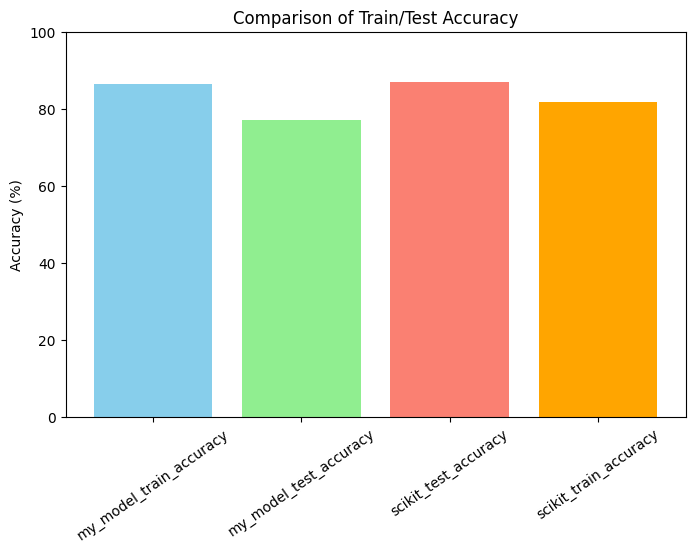

In [32]:
labels = list(all_accuracy.keys())
values = [v * 100 for v in all_accuracy.values()]  # convert to % if you like

plt.figure(figsize=(8,5))
plt.bar(labels, values, color=['skyblue', 'lightgreen', 'salmon', 'orange'], )
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Train/Test Accuracy')
plt.ylim(0, 100)
plt.xticks(rotation= 35)
plt.show()
